<a href="https://colab.research.google.com/github/Prabhat123456/Artificial-and-Computational-Intelligence---Space-Mission/blob/main/Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.manifold import TSNE
from collections import Counter


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# New section

In [ ]:
import pandas as pd 
df=pd.read_csv('/content/gdrive/MyDrive/ReviewsWithScore (1).csv')
negativeDF = pd.read_csv('/content/gdrive/MyDrive/NegativeReviews.csv')


In [ ]:
df['Reviews']

0      I am in a hospital bed and was relying on my k...
1      I’ve been using Walmart’s curbside pickup ever...
2      So far, I’ve gotten all my orders in time.  I ...
3      When sending to jail, it did not recognize the...
4               So convenient.  First time using.  A++++
                             ...                        
495    Products I need are always available and deliv...
496    The app and website are just not very easy to ...
497           5 minutes late and they cancelled my order
498    I am serious why I am able to complete the sur...
499    Purchased 1 year membership of Walmart +. \nNo...
Name: Reviews, Length: 500, dtype: object

In [ ]:
negativeDF['Reviews']

0      Prices are getting too high. Stock is low and ...
1      Shipping info on items were wrong and not just...
2      shipping orders get stuck at facility 99% of t...
3      What’s the point of scan & go if I have to wai...
4      After I scan all my items and pay, they have a...
                             ...                        
154    never received my package \nspent 1hour on the...
155    People who are in nursing homes and only get s...
156    The app and website are just not very easy to ...
157           5 minutes late and they cancelled my order
158    Purchased 1 year membership of Walmart +. \nNo...
Name: Reviews, Length: 159, dtype: object

In [ ]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
import re
from bs4 import BeautifulSoup
#from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')


In [ ]:
def decontracted(phrase):
    """Convert contractions like "can't" into "can not"
    """
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [ ]:
from tqdm import tqdm
preprocessed_reviews = []
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

# tqdm is for printing the status bar
for sentence in tqdm(df['Reviews'].values):
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    # https://gist.github.com/sebleier/554280
    sentence = ' '.join(sno.stem(e.lower()) for e in sentence.split() if e.lower() not in stopwords)
    preprocessed_reviews.append(sentence.strip())

  0%|          | 0/500 [00:00<?, ?it/s]<ipython-input-11-6862b689338b>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, 'lxml').get_text()
100%|██████████| 500/500 [00:00<00:00, 1856.48it/s]


In [ ]:
from tqdm import tqdm
preprocessed_negativereviews = []
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

# tqdm is for printing the status bar
for sentence in tqdm(negativeDF['Reviews'].values):
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = decontracted(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    # https://gist.github.com/sebleier/554280
    sentence = ' '.join(sno.stem(e.lower()) for e in sentence.split() if e.lower() not in stopwords)
    preprocessed_negativereviews.append(sentence.strip())

  0%|          | 0/159 [00:00<?, ?it/s]<ipython-input-12-63fc3cd5afe2>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, 'lxml').get_text()
100%|██████████| 159/159 [00:00<00:00, 1323.51it/s]


In [ ]:
preprocessed_reviews

['hospit bed reli kid bring groceri take toll realli appreci deliveri walmart hous great',
 'use walmart curbsid pickup ever sinc start covid love love love save much time absolut wonder hope walmart continu servic forev thank walmart loyal custom forev',
 'far gotten order time order mani time easi',
 'send jail not recogn address order amazon',
 'conveni first time use',
 'graciasssssss',
 'price get high stock low sub par shopper',
 'convien better amazon',
 'ship info item wrong not littl bit shop watercolor paint brush start grandchildren paint made note ever item put cart need deliv two day ad item two day ship hit complet sale would say deliveri may spent better part last two hour place thing cart would remov replac know least time mislead time consum walmart no longer go',
 'ship order get stuck facil time never get order cancel either worker lazi purpos point',
 'bill patient kind chase friend eager help find need pleasant peopl talk',
 'complet satisfi find item need item sug

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() 
xTotalReviews = vectorizer.fit_transform(preprocessed_reviews)
finaltotalReviews = pd.DataFrame(xTotalReviews.toarray(), columns =vectorizer.get_feature_names_out())
finaltotalReviews

,abil,abl,absolut,abysm,accept,acces,accident,accord,account,accur,...,xtreme,ya,year,yes,yesterday,yet,young,yule,zero,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer() 
xnegativereviews = vectorizer.fit_transform(preprocessed_negativereviews)
finalnegativereviews = pd.DataFrame(xnegativereviews.toarray(), columns =vectorizer.get_feature_names_out())
finalnegativereviews


,abil,abl,absolut,abysm,accept,accident,account,across,act,activ,...,worth,would,wow,wrong,xbox,ya,year,yesterday,zero,zip
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

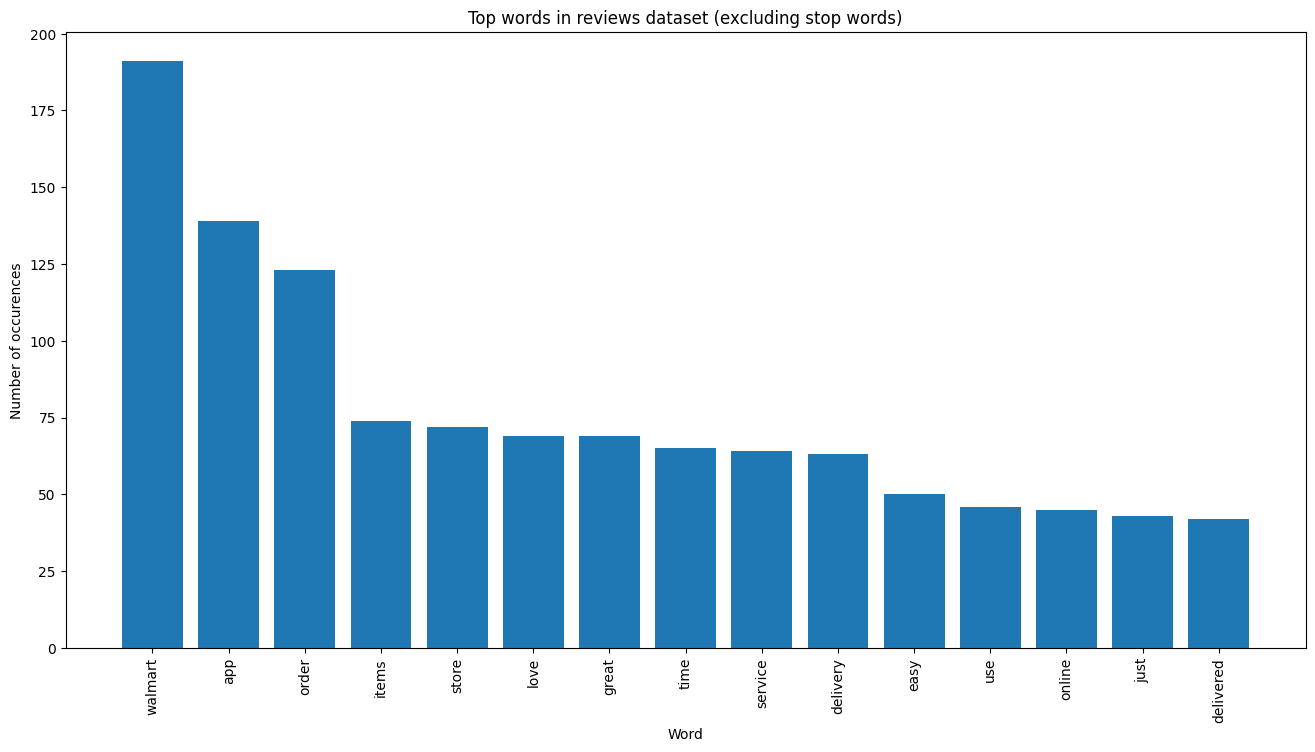

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['Reviews'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in reviews dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

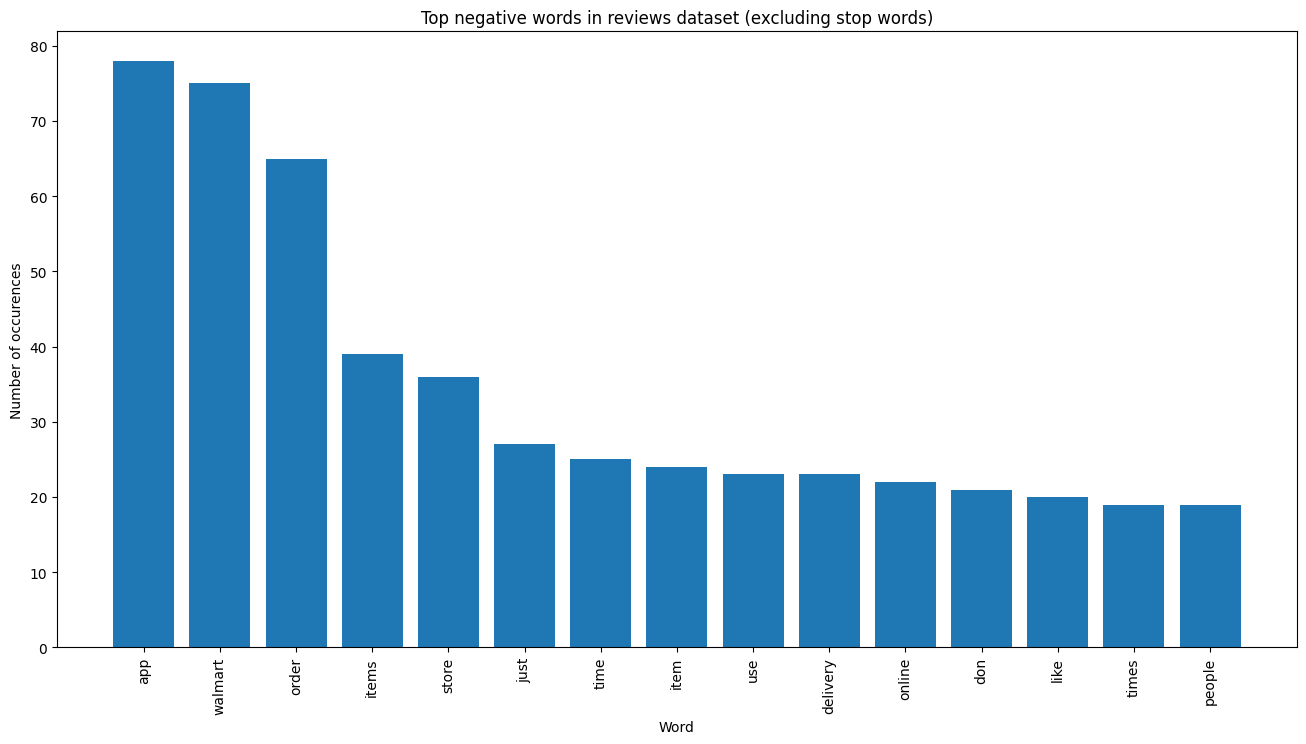

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=negativeDF['Reviews'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top negative words in reviews dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [ ]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data.dropna(how="any")
    
    for col in ['Reviews']:
        data[col] = data[col].apply(clean_sentence)
    
    return data

data = clean_dataframe(df)
data.head(5)

,Reviews,Review,Score
0,hospital bed relying kids bring groceries taki...,5,POSITIVE
1,ive walmarts curbside pickup start covid love ...,5,POSITIVE
2,ive orders time ordered times easy,5,POSITIVE
3,sending jail recognize address order amazon,4,POSITIVE
4,convenient time using,5,POSITIVE


In [ ]:
negativeData = clean_dataframe(negativeDF)
negativeData.head(5)

,Reviews,Review,Score
0,prices high stock low shoppers,1,Negative
1,shipping info items wrong bit shopping waterco...,2,Negative
2,shipping orders stuck facility 99 time order c...,1,Negative
3,whats point scan wait line scan qr code,2,Negative
4,scan items pay associate scan items associate ...,1,Negative


In [ ]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Reviews']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpusNegativeData = build_corpus(negativeData)        
corpusNegativeData[0:2]

<ipython-input-221-cc82d2dd7fe7>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for sentence in data[col].iteritems():


[['prices', 'high', 'stock', 'low', 'shoppers'],
 ['shipping',
  'info',
  'items',
  'wrong',
  'bit',
  'shopping',
  'watercolor',
  'paints',
  'brushes',
  'start',
  'grandchildren',
  'painting',
  'made',
  'note',
  'item',
  'put',
  'cart',
  'needed',
  'delivered',
  'days',
  'added',
  'items',
  'day',
  'shipping',
  'hit',
  'complete',
  'delivery',
  '22',
  'spent',
  'part',
  'hours',
  'placing',
  'things',
  'cart',
  'remove',
  'replacing',
  '10',
  'times',
  'misleading',
  'time',
  'consuming',
  'walmart',
  'longer']]

In [ ]:
corpus = build_corpus(data)        
corpus[0:2]

<ipython-input-21-cc82d2dd7fe7>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for sentence in data[col].iteritems():


[['hospital',
  'bed',
  'relying',
  'kids',
  'bring',
  'groceries',
  'taking',
  'toll',
  'appreciate',
  'delivery',
  'walmart',
  'house',
  'great',
  ''],
 ['ive',
  'walmarts',
  'curbside',
  'pickup',
  'start',
  'covid',
  'love',
  'love',
  'love',
  'saves',
  'timeits',
  'absolutely',
  'wonderful',
  'hope',
  'walmart',
  'continues',
  'service',
  'forever',
  'walmart',
  'loyal',
  'customer',
  'forever']]

In [ ]:
from gensim.models import word2vec
modelNegative = word2vec.Word2Vec(corpusNegativeData, window=20, min_count=1, workers=4)
modelNegative.wv['prices']

array([-8.6685466e-03,  1.2540496e-03,  7.2338427e-03,  8.4141819e-03,
       -4.5888484e-03, -6.5088114e-03, -5.4151532e-03,  6.1323214e-03,
        1.2002939e-03, -1.1111762e-02,  1.3595986e-03, -1.1370579e-02,
        2.8972959e-04,  5.4112482e-03, -3.7612466e-03, -1.0904564e-03,
       -2.5346843e-03, -1.0870578e-02, -1.9767762e-03,  2.7846530e-04,
       -7.3508574e-03, -5.1163351e-03,  1.4662309e-04,  6.7734369e-03,
       -8.3838262e-05,  9.9591697e-03, -9.2385877e-03,  7.5383089e-03,
       -5.9755873e-03, -5.9457943e-03, -5.4758708e-03,  2.0300066e-03,
       -2.3439510e-03,  6.4588767e-03, -1.9205818e-03,  5.7183043e-03,
        6.0237590e-03, -1.0204335e-02, -4.1408585e-03, -8.3145471e-03,
       -8.0699613e-03,  1.6642926e-03,  2.3107657e-03, -2.3079547e-03,
       -3.1862725e-04, -7.2209118e-03, -4.6056360e-03,  1.0283993e-03,
        8.5916733e-03,  8.6012911e-03, -2.4496377e-03,  1.5429297e-03,
       -2.6689551e-03, -5.3356783e-03, -5.4216138e-03, -4.9079582e-03,
      

In [ ]:
from gensim.models import word2vec
model = word2vec.Word2Vec(corpus, window=20, min_count=1, workers=4)
model.wv['packs']

array([ 0.0064633 , -0.00813309,  0.00979849,  0.00574854, -0.00360903,
       -0.00846371, -0.00270426, -0.00166307, -0.00273002,  0.00565724,
        0.0014453 , -0.00889538,  0.00541593, -0.0055588 , -0.00168369,
       -0.00950415,  0.00971973, -0.00354612,  0.00636633, -0.00521279,
       -0.00387174, -0.0075478 ,  0.00617938, -0.00105241, -0.00791455,
       -0.00375199, -0.00494993,  0.00847373, -0.0070064 ,  0.00774066,
        0.00731357,  0.00924826, -0.0088812 , -0.00210217,  0.00110146,
       -0.00236208,  0.00585046, -0.0070851 ,  0.00706658,  0.00557527,
        0.00690476, -0.00099789, -0.00697512, -0.00019794,  0.00493494,
        0.00163681,  0.003714  , -0.00852927,  0.00259004, -0.00266984,
        0.00791271,  0.00649704, -0.00159366, -0.00892675,  0.00256343,
        0.00979528, -0.0017591 , -0.00697981, -0.00700916, -0.00586607,
        0.00262258,  0.00305089,  0.0056837 ,  0.00928692, -0.00170249,
       -0.00726648,  0.00043818, -0.00577692,  0.00749951, -0.00

In [ ]:
tupled_lst = set(map(tuple, corpusNegativeData))
corpusNegativeData = map(list, tupled_lst)

In [ ]:
from gensim.models import word2vec
modelNegativess = word2vec.Word2Vec(corpusNegativeData, window=20, min_count=1, workers=4)
modelNegativess.wv['prices']



array([-7.4103619e-03,  6.6182576e-03, -3.3724105e-03, -9.1466424e-04,
        5.3590881e-03,  4.5699333e-03,  6.2081125e-03,  7.0277131e-03,
        5.6163981e-03, -8.9188302e-03,  5.1445272e-03,  9.1253212e-03,
       -4.0063607e-03,  1.0816014e-03, -3.2792091e-03, -3.4029423e-03,
        8.6932965e-03, -2.7982713e-04,  3.4074627e-03, -5.5328486e-03,
        5.7739685e-03, -3.3548998e-03, -4.9688267e-03,  2.1918691e-03,
        9.7215315e-03, -6.1311652e-03,  3.5739136e-03, -9.9280116e-04,
       -7.1910145e-03, -4.3305624e-03, -8.2193222e-03,  5.5899429e-03,
       -2.7526962e-03, -5.1993635e-03,  9.9801656e-04,  4.5889402e-03,
        9.4981082e-03, -9.7352127e-03, -2.7575850e-04, -1.2296820e-03,
       -2.7000736e-03, -5.3002476e-04,  8.1299292e-03, -1.8766213e-03,
        9.3343342e-03,  3.7805320e-04, -1.0646307e-03,  6.9046007e-03,
        6.9426368e-03,  4.5891522e-04, -3.0289293e-04,  6.3429163e-03,
       -3.8443613e-03,  4.5933365e-03, -8.5021260e-05, -6.0780393e-03,
      

In [ ]:
keys = ['orders', 'item', 'store', 'time','delivery', 'online']
#keys = model.wv.key_to_index.keys()
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in modelNegativess.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(modelNegativess.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(n_components = 2, init = 'random', random_state = 20, perplexity = 100)
#TSNE(perplexity=15, n_components=2, init='pca', n_iter=2500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_model_en_2d.kl_divergence_

0.4404132664203644

/usr/local/lib/python3.10/dist-packages/mplcursors/_pick_info.py:55: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  paths = scatter.__wrapped__(*args, **kwargs)


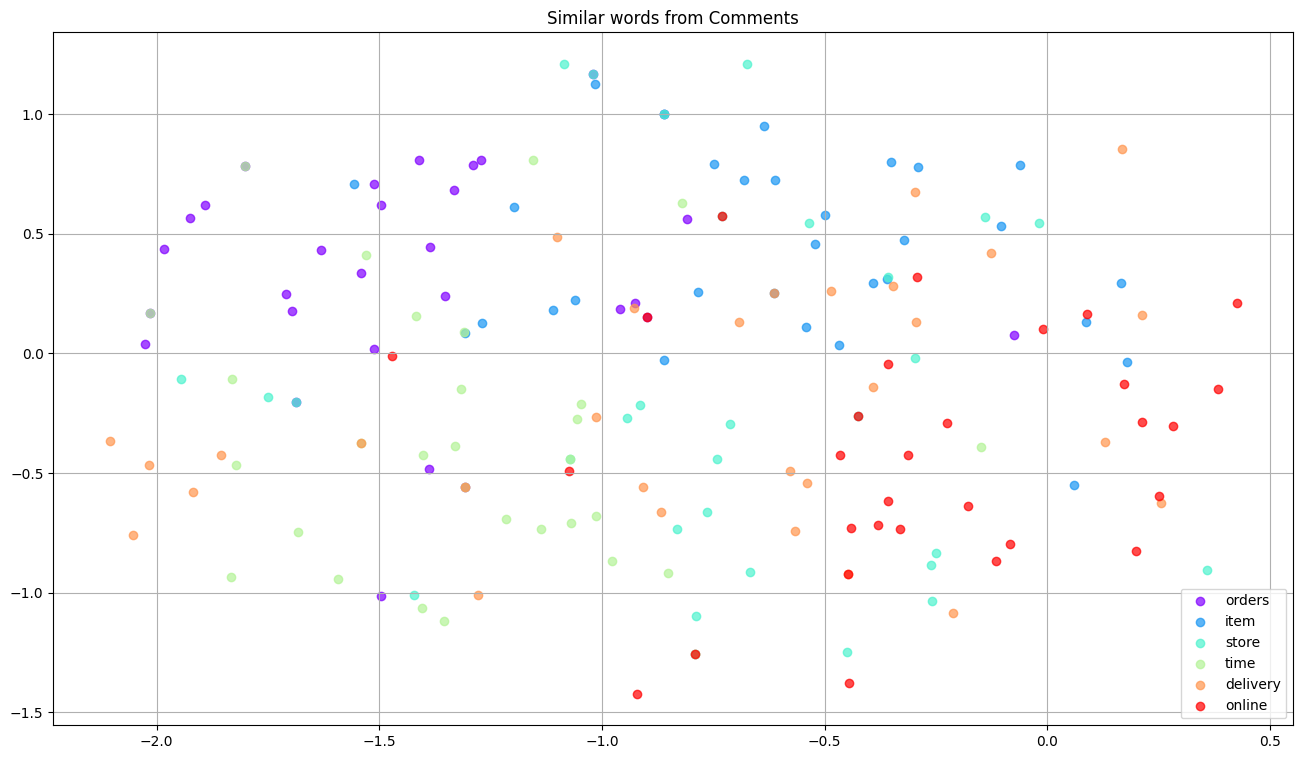

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm



def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        # for i, word in enumerate(words):
        #     plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
        #                  textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Comments', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [ ]:
pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as numpy
import mplcursors
from adjustText import adjust_text
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in list(model.wv.index_to_key):
        tokens.append(model.wv[word])
        labels.append(word)
    embedding_clusters = []
   # embedding_clusters.append(tokens)
    tsne_model = TSNE(n_components = 2, init = 'random', random_state = 20, perplexity = 100)
    #TSNE(perplexity=23, n_components=3, init='pca', n_iter=250, random_state=20)
    new_values = tsne_model.fit_transform(np.array(tokens))
    print(tsne_model.kl_divergence_)
    

    x = []
    y = []
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 8)) 
    a = []
    b = []
    count = 0
    county = 0 
    for i in range(len(x)):
        # count = x[i] + count+4
        # county = y[i] + county + 4
        # matches = list(set(a) & set(numpy.array(x[i])))
        # matchesY = list(set(b) & set(numpy.linspace(y[i])))
        matches = x[i] in a
        matchesY = y[i] in b
        # if bool(matches):
        #   print(count)
        #   count = count+2
        #   x[i] = x[i]+count
          
        # if bool(matchesY):
        #   print("i am inside")
        #   print(county)
        #   county = county + 2
        #   y[i] = y[i] + county 
        plt.scatter(x[i],y[i])
        #mplcursors.cursor(multiple = True).connect("add", lambda sel: sel.annotation.set_text(labels[i]))
        # plt.annotate(labels[i],
        #              xy=(x[i],y[i]),
        #              xytext=(5, 2),
        #              textcoords='offset points',
        #              ha='right',
        #              va='bottom')
        a.append(x[i])
        b.append(y[i])
        
    plt.show()

2.059431552886963


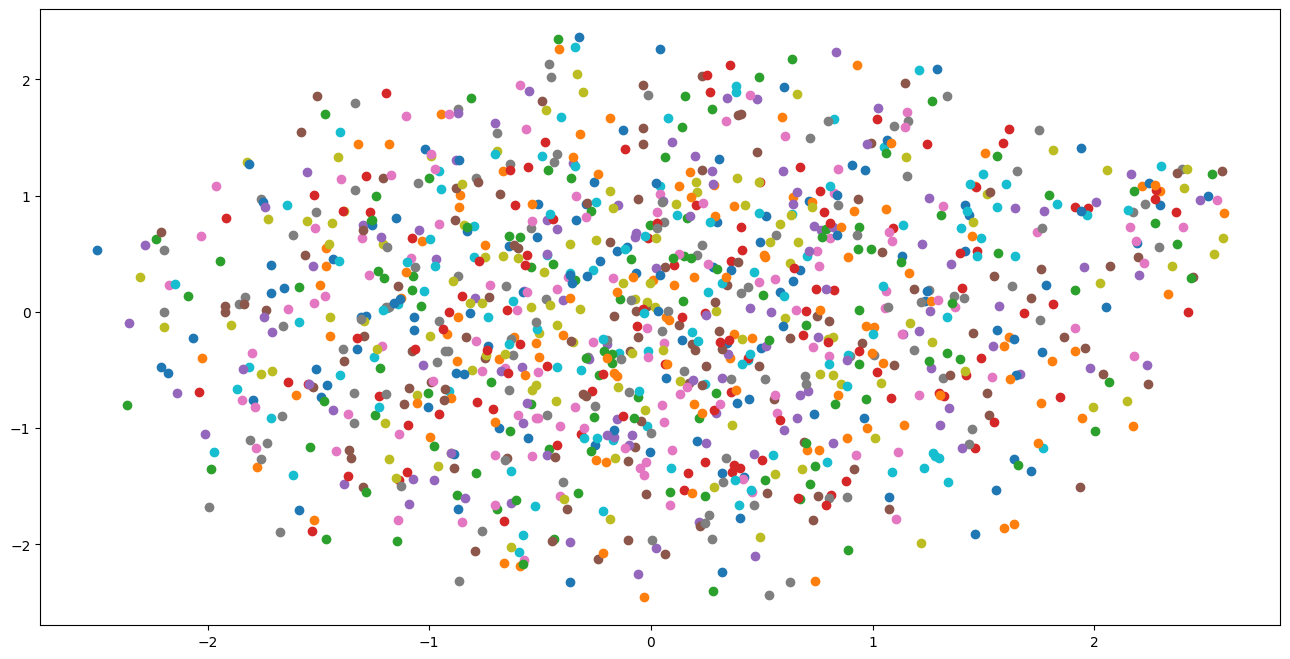

In [ ]:
# model1 = word2vec.Word2Vec(corpusNegativeData, vector_size=100, window=20, min_count=3, workers=4)
# tsne_plot(model1)
#corpus
from gensim.models import word2vec
modelNegativess = word2vec.Word2Vec(corpusNegativeData, window=20, min_count=1, workers=4)
modelNegativess.wv['prices']
tsne_plot(modelNegativess)


In [ ]:
def tsne_div(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in list(model.wv.index_to_key):
        tokens.append(model.wv[word])
        labels.append(word)
    embedding_clusters = []
   # embedding_clusters.append(tokens)
    tsne_model = TSNE(perplexity=10, n_components=3, init='pca', n_iter=250, random_state=16)
    new_values = tsne_model.fit_transform(np.array(tokens))
    print(tsne_model.kl_divergence_)


In [ ]:
tsne_div(modelNegative)


1.7976931348623157e+308


In [ ]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Reviews']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(df)        
corpus[0:2]

<ipython-input-34-6a9276a69ead>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for sentence in data[col].iteritems():


[['I',
  'am',
  'in',
  'a',
  'hospital',
  'bed',
  'and',
  'was',
  'relying',
  'on',
  'my',
  'kids',
  'to',
  'bring',
  'me',
  'groceries',
  'which',
  'is',
  'taking',
  'a',
  'toll',
  'I',
  'really',
  'appreciate',
  'the',
  'delivery',
  'that',
  'Walmart',
  'does',
  'to',
  'the',
  'house',
  'it’s',
  'great',
  '!'],
 ['I’ve',
  'been',
  'using',
  'Walmart’s',
  'curbside',
  'pickup',
  'ever',
  'since',
  'the',
  'start',
  'of',
  'Covid.',
  'I',
  'love,',
  'love,',
  'love',
  'it.',
  'It',
  'saves',
  'me',
  'so',
  'much',
  'time…it’s',
  'absolutely',
  'wonderful.',
  'I',
  'hope',
  'that',
  'Walmart',
  'continues',
  'this',
  'service',
  'FOREVER!!!',
  'Thank',
  'you,',
  'Walmart!',
  'I',
  'will',
  'be',
  'a',
  'loyal',
  'customer',
  'forever!!!❤️']]

In [ ]:
from gensim.models import word2vec
model = word2vec.Word2Vec(corpus, window=20, min_count=1, workers=4)
model.wv
#model.wv['FOREVER']


RuntimeError: ignored

In [ ]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = df['Reviews'].sample(n=500, random_state=0).values

print('Reviews before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Reviews after vectorization: \n{}'.format(small_document_term_matrix[123]))

Reviews before vectorization: sugar items. See I’m a diabetic. I can’t have too much real sugar. They need to add a section on the substitution page to request certain items only be substituted for that specific type. Like sugar free pancake syrup be replaced with another brand of sugar free syrup. I’ve had Items changed to real sugar item a few times and they just go to waste because I won’t eat them.
Reviews after vectorization: 
  (0, 888)	3
  (0, 907)	1
  (0, 64)	1
  (0, 887)	1
  (0, 1860)	1
  (0, 1774)	1
  (0, 962)	1
  (0, 273)	1
  (0, 1903)	1
  (0, 1236)	1
  (0, 281)	1
  (0, 1115)	1
  (0, 536)	1
  (0, 670)	2
  (0, 1711)	5
  (0, 474)	1
  (0, 1398)	2
  (0, 1542)	1
  (0, 1704)	1
  (0, 1449)	1
  (0, 1702)	1
  (0, 1643)	1
  (0, 1823)	1
  (0, 1242)	1
  (0, 1736)	2
  (0, 1444)	1
  (0, 209)	1
  (0, 1931)	1


In [ ]:
#because we need 10 topics
n_topics = 10

In [ ]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)


In [ ]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [ ]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [ ]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii','ignore').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [ ]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  walmart app order time items love store delivered delivery service
Topic 2:  happy address mailing figure charge delete old let min 35
Topic 3:  app use store easy scan things check pickup just item
Topic 4:  people items don stuff need work doesn just walmart drivers
Topic 5:  order item online week items store great wait times able
Topic 6:  tires tire walmart order later car week pick com check
Topic 7:  good money ve veces pickup el la prepared service quality
Topic 8:  delivery love groceries great like dont ask free really shopping
Topic 9:  service great store customer thank good friendly job excellent did
Topic 10:  muy que fcil lo rpido es para apple recomiendo son


In [ ]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = [''.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(32,16))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of headlines');
ax.set_title('LSA topic counts');
plt.show()

NameError: ignored

In [ ]:
count_vect = CountVectorizer() #in scikit-learn
count_vect.fit(preprocessed_reviews)

final_counts = count_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_counts))
print("the shape of out text BOW vectorizer ",final_counts.get_shape())
print("the number of unique words ", final_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text BOW vectorizer  (500, 1584)
the number of unique words  1584


In [ ]:
#bi-gram, tri-gram and n-gram

#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# you can choose these numebrs min_df=10, max_features=5000, of your choice
count_vect = CountVectorizer(ngram_range=(1,2))
final_bigram_counts = count_vect.fit_transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_bigram_counts))
print("the shape of out text BOW vectorizer ",final_bigram_counts.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_bigram_counts.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text BOW vectorizer  (500, 7368)
the number of unique words including both unigrams and bigrams  7368


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_reviews)

final_tf_idf = tf_idf_vect.transform(preprocessed_reviews)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse._csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (500, 147)
the number of unique words including both unigrams and bigrams  147


In [ ]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance=[]
for sentance in preprocessed_reviews:
    list_of_sentance.append(sentance.split())


In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
w2v_model=Word2Vec(list_of_sentance,min_count=5, workers=4)
print(w2v_model.wv.most_similar('great'))
print('='*50)
print(w2v_model.wv.most_similar('bad'))

[('store', 0.9941524267196655), ('not', 0.994034469127655), ('app', 0.99399733543396), ('walmart', 0.9938738346099854), ('get', 0.9938234686851501), ('order', 0.9937263131141663), ('deliveri', 0.9934796094894409), ('time', 0.9934544563293457), ('deliv', 0.9933898448944092), ('pay', 0.9933180809020996)]
[('order', 0.9748262763023376), ('no', 0.9747775793075562), ('also', 0.9736064672470093), ('look', 0.9735137224197388), ('ship', 0.973423957824707), ('item', 0.9733151197433472), ('like', 0.9731152057647705), ('use', 0.9730541110038757), ('could', 0.9730424880981445), ('app', 0.9728588461875916)]


In [ ]:
from gensim.test.utils import lee_corpus_list
from gensim.models import Word2Vec
w2v_words = list(w2v_model.wv.index_to_key)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:30])

number of words that occured minimum 5 times  354
sample words  ['walmart', 'order', 'app', 'not', 'item', 'time', 'get', 'store', 'use', 'love', 'great', 'deliveri', 'servic', 'alway', 'shop', 'no', 'thank', 'deliv', 'groceri', 'easi', 'go', 'day', 'onlin', 'need', 'ship', 'work', 'would', 'like', 'custom', 'price']


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance): # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 500/500 [00:00<00:00, 6197.53it/s]

500
100


In [ ]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
from sklearn.feature_extraction.text import TfidfVectorizer
model = TfidfVectorizer()
model.fit(preprocessed_reviews)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names_out(), list(model.idf_)))

In [ ]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names_out() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance): # for each review/sentence 
    sent_vec = np.zeros(100) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|██████████| 500/500 [00:00<00:00, 1642.17it/s]


In [ ]:
# As BoW and TF-IDF gives sparse matrix, and TSNE only accepts Dense matrix.so we need to convert sparse matrix to dense
from sklearn.preprocessing import StandardScaler
print(final_bigram_counts.shape)
std_data = StandardScaler(with_mean = False).fit_transform(final_bigram_counts)
print(std_data.shape)
type(std_data)
std_data=std_data.toarray()
print(type(std_data))

(500, 7368)
(500, 7368)
<class 'numpy.ndarray'>


In [ ]:
score=df['Score'] #storing all scores in a new series.
print(type(score))
print(score.shape)

<class 'pandas.core.series.Series'>
(500,)


In [ ]:
std_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Text(0.5, 1.0, 'TSNE for Bag of Words')

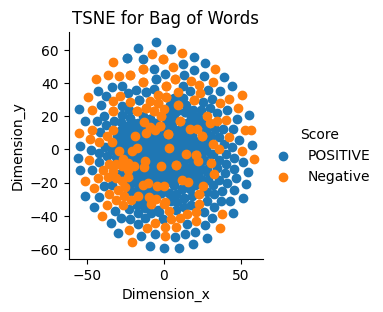

In [ ]:
from sklearn.manifold import TSNE
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


model = TSNE(n_components=10, perplexity=45, learning_rate=100, n_iter = 500, random_state=0)
for_tsne = model.fit_transform(std_data, score)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.todense()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((for_tsne.T, score)).T
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
sns.FacetGrid(for_tsne_df, hue="Score").map(plt.scatter, 'Dimension_x', 'Dimension_y').add_legend()
plt.title("TSNE for Bag of Words")

In [ ]:
from sklearn.preprocessing import StandardScaler

std_data1 = StandardScaler(with_mean = False).fit_transform(final_tf_idf)
print(std_data1.shape)
type(std_data1)
std_data1=std_data1.toarray()
type(std_data1)

(500, 147)


numpy.ndarray

Text(0.5, 1.0, 'TF-IDF')

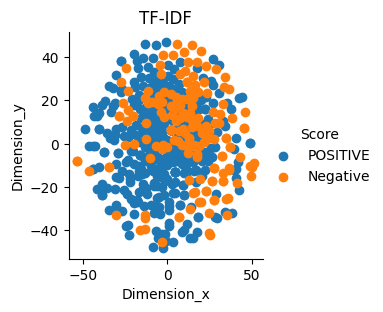

In [ ]:
model = TSNE(n_components=2, perplexity=40, learning_rate=100, n_iter=500)

for_tsne = model.fit_transform(std_data1)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.todense()) , .toarray() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((for_tsne.T, score)).T
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
sns.FacetGrid(for_tsne_df, hue="Score").map(plt.scatter, 'Dimension_x', 'Dimension_y').add_legend()
plt.title("TF-IDF")

In [ ]:
from sklearn.preprocessing import StandardScaler

std_data2 = StandardScaler(with_mean = False).fit_transform(sent_vectors)
print(std_data2.shape)
type(std_data2)
type(std_data2)

(500, 100)


numpy.ndarray

Text(0.5, 1.0, 'AVG W2V')

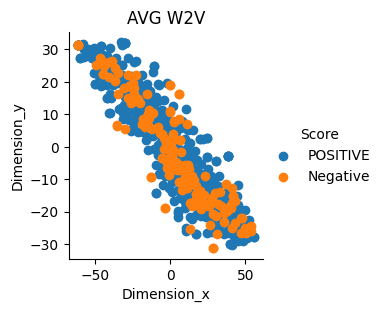

In [ ]:
model = TSNE(n_components=2, perplexity=30, learning_rate=600, n_iter=500)

for_tsne = model.fit_transform(std_data2)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.todense()) , .todense() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((for_tsne.T, score)).T
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
sns.FacetGrid(for_tsne_df, hue="Score").map(plt.scatter, 'Dimension_x', 'Dimension_y').add_legend()
plt.title("AVG W2V")

In [ ]:
from sklearn.preprocessing import StandardScaler

std_data3 = StandardScaler(with_mean = False).fit_transform(tfidf_sent_vectors)
print(std_data3.shape)
type(std_data3)
type(std_data3)

(500, 100)


numpy.ndarray

Text(0.5, 1.0, 'Weighted W2V')

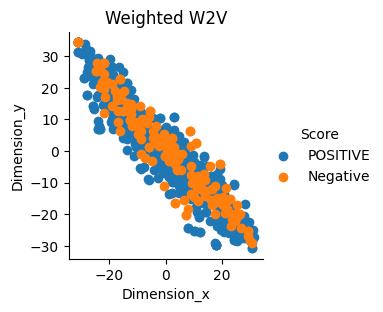

In [ ]:
model = TSNE(n_components=2, perplexity=40, learning_rate=600, n_iter=500)

for_tsne = model.fit_transform(std_data3)
# if x is a sparse matrix you need to pass it as X_embedding = tsne.fit_transform(x.todense()) , .todense() will convert the sparse matrix into dense matrix

for_tsne = np.vstack((for_tsne.T, score)).T
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
sns.FacetGrid(for_tsne_df, hue="Score").map(plt.scatter, 'Dimension_x', 'Dimension_y').add_legend()
plt.title("Weighted W2V")